In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/all_season_details.csv", low_memory=False)

In [5]:
df.head()

comment_id  season  match_id match_name home_team away_team  \
0         110  2023.0   1359475   GT v CSK        GT       CSK   
1         120  2023.0   1359475   GT v CSK        GT       CSK   
2         130  2023.0   1359475   GT v CSK        GT       CSK   
3         140  2023.0   1359475   GT v CSK        GT       CSK   
4         150  2023.0   1359475   GT v CSK        GT       CSK   

  current_innings  innings_id  over  ball  ...  wicket_id wkt_batsman_name  \
0             CSK           1     1     1  ...        NaN              NaN   
1             CSK           1     1     2  ...        NaN              NaN   
2             CSK           1     1     3  ...        NaN              NaN   
3             CSK           1     1     4  ...        NaN              NaN   
4             CSK           1     1     5  ...        NaN              NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls  wkt_text  \
0              NaN               NaN                NaN       NaN   
1              NaN               NaN                NaN       NaN   
2              NaN               NaN                NaN       NaN   
3              NaN               NaN                NaN       NaN   
4              NaN               NaN                NaN       NaN   

  isRetiredHurt                                               text  \
0         False  nice and full, angling and perhaps swinging in...   
1         False  Conway shuffles across off, and shimmies out a...   
2         False  good length, angling in at off and then straig...   
3         False  shorter and slanting into middle and leg, Gaik...   
4         False  Shami hits a heavy length and brings this back...   

                                             preText  postText  
0  <p><strong>7.30pm</strong> Gaikwad and Conway ...       NaN  
1                                                NaN       NaN  
2                                                NaN       NaN  
3  <p>Rummy: "Fast bowling options for CSK defini...       NaN  
4  <p>LG: "Watching out for Hangargekar. He was i...       NaN  

[5 rows x 45 columns]

In [6]:
df.isnull().sum()

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [11]:
df = df.drop(columns=['wkt_text', 'postText', 'preText', 'wicket_id','comment_id','text'])

In [13]:
df.isnull().sum()

season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wkt_batsman_name     230670
wkt_bowler_name     

In [15]:
# Find the mode (most frequent value) of the 'season' column
mode_season = df['season'].mode()[0]
print(f"The mode of the season column is: {mode_season}")

The mode of the season column is: 2013.0


In [17]:
# Fill missing values in the 'season' column with the mode value
df['season'].fillna(mode_season, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14792\1916529240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['season'].fillna(mode_season, inplace=True)


In [19]:
# Check if missing values are filled
missing_values_after_imputation = df['season'].isnull().sum()
print(f"Missing values in 'season' column after imputation: {missing_values_after_imputation}")

Missing values in 'season' column after imputation: 0


In [21]:
df.isnull().sum()

season                    0
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wkt_batsman_name     230670
wkt_bowler_name     

In [23]:
# Mode imputation for categorical columns
categorical_columns = ['batsman2_name', 'bowler2_id', 'bowler2_name', 'wkt_batsman_name', 'wkt_bowler_name', 'isRetiredHurt']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14792\365161621.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [25]:
# Backfilling for sequential numerical columns
numerical_columns = ['bowler2_overs', 'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wkt_batsman_runs', 'wkt_batsman_balls']
for col in numerical_columns:
    df[col].fillna(method='bfill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14792\2313940280.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(method='bfill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14792\2313940280.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col].fillna(method='bfill', inplace=True)


In [27]:
df.isnull().sum()

season                0
match_id              0
match_name            0
home_team             0
away_team             0
current_innings       0
innings_id            0
over                  0
ball                  0
runs                  0
shortText             0
isBoundary            0
isWide                0
isNoball              0
batsman1_id           0
batsman1_name         0
batsman1_runs         0
batsman1_balls        0
bowler1_id            0
bowler1_name          0
bowler1_overs         0
bowler1_maidens       0
bowler1_runs          0
bowler1_wkts          0
batsman2_id           0
batsman2_name         0
batsman2_runs         0
batsman2_balls        0
bowler2_id            0
bowler2_name          0
bowler2_overs         0
bowler2_maidens       0
bowler2_runs          0
bowler2_wkts          0
wkt_batsman_name      0
wkt_bowler_name       0
wkt_batsman_runs     15
wkt_batsman_balls    15
isRetiredHurt         0
dtype: int64

In [284]:
# Filling missing 'wkt_batsman_runs' and 'wkt_batsman_balls' using mean or median
df['wkt_batsman_runs'].fillna(df['wkt_batsman_runs'].median(), inplace=True)
df['wkt_batsman_balls'].fillna(df['wkt_batsman_balls'].median(), inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\3368061034.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\3368061034.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [285]:
# Check if there are still missing values in the relevant columns
print(df[['wkt_batsman_runs', 'wkt_batsman_balls']].isnull().sum())


wkt_batsman_runs     0
wkt_batsman_balls    0
dtype: int64


In [286]:
# Check data types
print(df.dtypes)

season               float64
match_id               int64
match_name            object
home_team             object
away_team             object
current_innings       object
innings_id             int64
over                   int64
ball                   int64
runs                   int64
shortText             object
isBoundary              bool
isWide                  bool
isNoball                bool
batsman1_id            int64
batsman1_name         object
batsman1_runs          int64
batsman1_balls         int64
bowler1_id             int64
bowler1_name          object
bowler1_overs        float64
bowler1_maidens        int64
bowler1_runs           int64
bowler1_wkts           int64
batsman2_id           object
batsman2_name         object
batsman2_runs          int64
batsman2_balls         int64
bowler2_id           float64
bowler2_name          object
bowler2_overs        float64
bowler2_maidens      float64
bowler2_runs         float64
bowler2_wkts         float64
wkt_batsman_na

In [287]:
# Convert columns to appropriate data types
df['season'] = df['season'].astype('category')
df['isBoundary'] = df['isBoundary'].astype('bool')
df['runs'] = df['runs'].astype('int')

2. Outlier Detection and Handling:

In [289]:
# Calculate IQR for runs and balls
Q1 = df['runs'].quantile(0.25)
Q3 = df['runs'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(df['runs'] >= lower_bound) & (df['runs'] <= upper_bound)]


In [290]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)


1


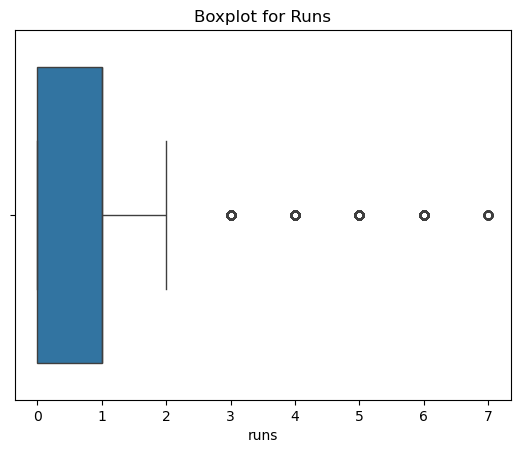

In [291]:
# Boxplot for 'runs' column
sns.boxplot(x=df['runs'])
plt.title('Boxplot for Runs')
plt.show()

In [292]:
# Identify rows that are outliers (outside the IQR bounds)
outliers = df[(df['runs'] < (Q1 - 1.5 * IQR)) | (df['runs'] > (Q3 + 1.5 * IQR))]


In [293]:
# Check how many outliers there are
print(f"Number of outliers: {len(outliers)}")
print(outliers)

Number of outliers: 40908
        season  match_id match_name home_team away_team current_innings  \
6       2023.0   1359475   GT v CSK        GT       CSK             CSK   
8       2023.0   1359475   GT v CSK        GT       CSK             CSK   
18      2023.0   1359475   GT v CSK        GT       CSK             CSK   
19      2023.0   1359475   GT v CSK        GT       CSK             CSK   
22      2023.0   1359475   GT v CSK        GT       CSK             CSK   
...        ...       ...        ...       ...       ...             ...   
242519  2008.0    336040   CSK v RR       CSK        RR              RR   
242521  2008.0    336040   CSK v RR       CSK        RR              RR   
242524  2008.0    336040   CSK v RR       CSK        RR              RR   
242527  2008.0    336040   CSK v RR       CSK        RR              RR   
242543  2008.0    336040   CSK v RR       CSK        RR              RR   

        innings_id  over  ball  runs  ...          bowler2_name  \
6     

In [294]:
# Show the first few rows of the outliers
print(outliers.head())


    season  match_id match_name home_team away_team current_innings  \
6   2023.0   1359475   GT v CSK        GT       CSK             CSK   
8   2023.0   1359475   GT v CSK        GT       CSK             CSK   
18  2023.0   1359475   GT v CSK        GT       CSK             CSK   
19  2023.0   1359475   GT v CSK        GT       CSK             CSK   
22  2023.0   1359475   GT v CSK        GT       CSK             CSK   

    innings_id  over  ball  runs  ...    bowler2_name  bowler2_overs  \
6            1     2     1     4  ...  Mohammed Shami            1.0   
8            1     2     3     4  ...  Mohammed Shami            1.0   
18           1     4     1     6  ...  Mohammed Shami            2.0   
19           1     4     2     4  ...  Mohammed Shami            2.0   
22           1     4     5     4  ...  Mohammed Shami            2.0   

    bowler2_maidens  bowler2_runs  bowler2_wkts wkt_batsman_name  \
6               0.0           1.0           0.0     Rohit Sharma   
8   

In [295]:
# Calculate the percentage of outliers in your data
total_rows = len(df)
outlier_percentage = (len(outliers) / total_rows) * 100
print(f"Outliers make up {outlier_percentage:.2f}% of the data.")

Outliers make up 16.87% of the data.


Encoding:

In [659]:
from sklearn.preprocessing import LabelEncoder

In [661]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [663]:
# List of categorical columns for label encoding
categorical_columns = [
    'match_name', 
    'batsman1_name', 
    'batsman2_name', 
    'bowler1_name', 
    'bowler2_name', 
    'wkt_batsman_name', 
    'wkt_bowler_name'
]
# Apply label encoding to each column
for column in categorical_columns:
    # Handle NaN values before encoding
    df[column] = df[column].fillna('Unknown')
    # Apply label encoding
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

# Display the first few rows of the updated DataFrame
print(df.head())

   season  match_id match_name home_team away_team current_innings  \
0  2023.0   1359475   GT v CSK        GT       CSK             CSK   
1  2023.0   1359475   GT v CSK        GT       CSK             CSK   
2  2023.0   1359475   GT v CSK        GT       CSK             CSK   
3  2023.0   1359475   GT v CSK        GT       CSK             CSK   
4  2023.0   1359475   GT v CSK        GT       CSK             CSK   

   innings_id  over  ball  runs  ... strike_rate  over_category  run_rate  \
0           1     1     1     0  ...         0.0      Powerplay  0.000000   
1           1     1     2     1  ...         0.0      Powerplay  0.750000   
2           1     1     3     0  ...         0.0      Powerplay  0.666667   
3           1     1     4     1  ...        50.0      Powerplay  1.200000   
4           1     1     5     0  ...         0.0      Powerplay  1.090909   

   match_name_encoded  batsman1_name_encoded batsman2_name_encoded  \
0                  33                    157  

In [665]:
# Columns for one-hot encoding
one_hot_columns = ['current_innings', 'home_team', 'away_team']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

# Display the updated DataFrame
print("DataFrame after One-Hot Encoding:")
print(df_encoded.head())
print("New Columns after Encoding:", df_encoded.columns)


DataFrame after One-Hot Encoding:
   season  match_id match_name  innings_id  over  ball  runs  \
0  2023.0   1359475   GT v CSK           1     1     1     0   
1  2023.0   1359475   GT v CSK           1     1     2     1   
2  2023.0   1359475   GT v CSK           1     1     3     0   
3  2023.0   1359475   GT v CSK           1     1     4     1   
4  2023.0   1359475   GT v CSK           1     1     5     0   

                             shortText  isBoundary  isWide  ...  \
0     Mohammed Shami to Conway, no run       False   False  ...   
1  Mohammed Shami to Conway, 1 leg bye       False   False  ...   
2    Mohammed Shami to Gaikwad, no run       False   False  ...   
3     Mohammed Shami to Gaikwad, 1 run       False   False  ...   
4     Mohammed Shami to Conway, no run       False   False  ...   

   away_team_KXIP  away_team_Kochi away_team_LSG  away_team_MI  \
0           False            False         False         False   
1           False            False         Fal

In [669]:
df.value_counts()

season  match_id  match_name  home_team  away_team  current_innings  innings_id  over  ball  runs  shortText                      isBoundary  isWide  isNoball  batsman1_id  batsman1_name   batsman1_runs  batsman1_balls  bowler1_id  bowler1_name         bowler1_overs  bowler1_maidens  bowler1_runs  bowler1_wkts  batsman2_id  batsman2_name     batsman2_runs  batsman2_balls  bowler2_id  bowler2_name         bowler2_overs  bowler2_maidens  bowler2_runs  bowler2_wkts  wkt_batsman_name  wkt_bowler_name      wkt_batsman_runs  wkt_batsman_balls  isRetiredHurt  runs_log  strike_rate  over_category  run_rate       match_name_encoded  batsman1_name_encoded  batsman2_name_encoded  bowler1_name_encoded  bowler2_name_encoded  wkt_batsman_name_encoded  wkt_bowler_name_encoded
2008.0  335982    RCB v KKR   RCB        KKR        KKR              1           1     1     1     Kumar to Ganguly, 1 leg bye    False       False   False     28779        Sourav Ganguly  0              1               30732   

Value counts for 'home_team':
home_team
CSK      29624
SRH      29061
DC       28900
RCB      28478
MI       28333
KKR      26724
RR       22804
KXIP     21994
PWI       5478
PBKS      4817
GT        4369
LSG       3598
GL        3526
RPS       3284
Kochi     1559
Name: count, dtype: int64

Value counts for 'away_team':
away_team
MI       30851
KKR      28963
SRH      28553
RCB      27839
DC       27174
RR       25901
CSK      23771
KXIP     22922
PWI       5399
PBKS      5224
RPS       3722
GT        3572
GL        3562
LSG       3470
Kochi     1626
Name: count, dtype: int64

Unique values in key categorical columns:
home_team: 15
away_team: 15
batsman1_name: 637
bowler1_name: 504


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\1702056616.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




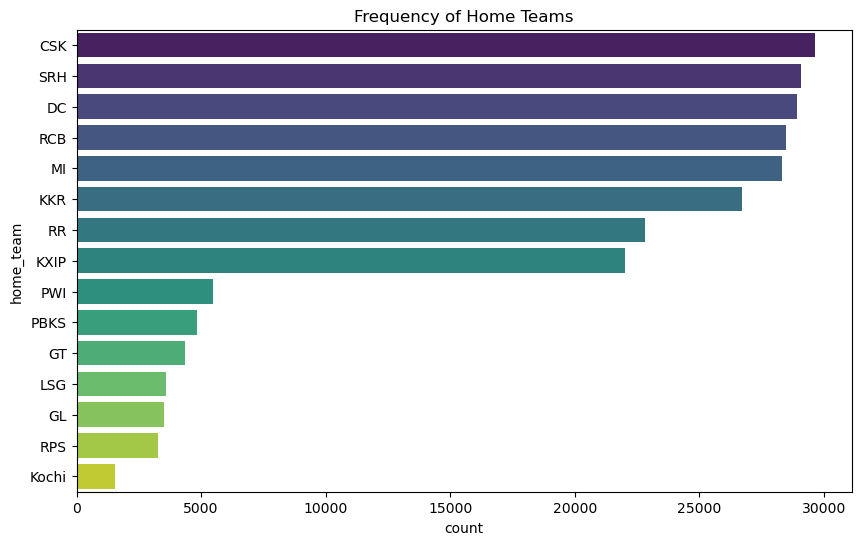

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\1702056616.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




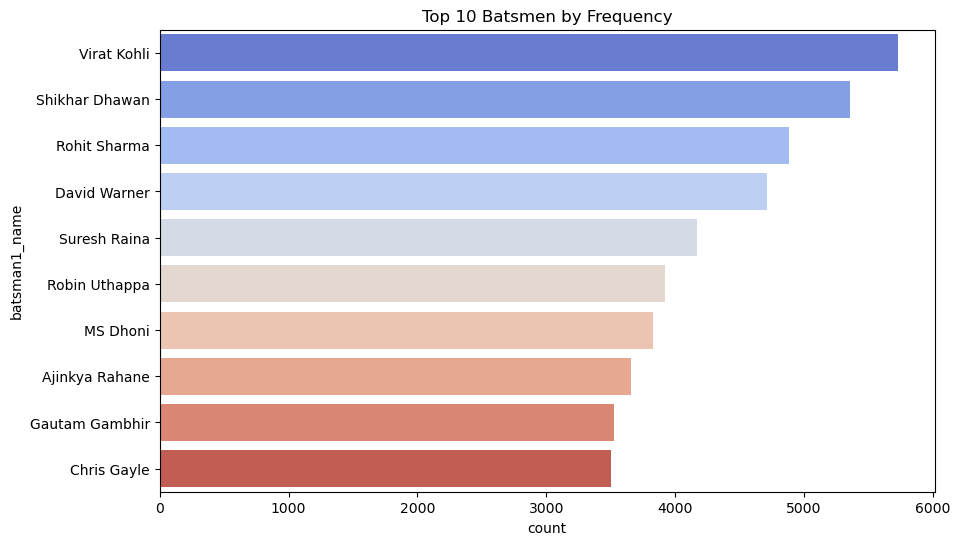

In [671]:
# Analyze 'home_team' column
print("Value counts for 'home_team':")
print(df['home_team'].value_counts())

# Analyze 'away_team' column
print("\nValue counts for 'away_team':")
print(df['away_team'].value_counts())

# Check for columns with high cardinality
print("\nUnique values in key categorical columns:")
print("home_team:", df['home_team'].nunique())
print("away_team:", df['away_team'].nunique())
print("batsman1_name:", df['batsman1_name'].nunique())
print("bowler1_name:", df['bowler1_name'].nunique())

# Visualize the frequency distribution of key columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y=df['home_team'], order=df['home_team'].value_counts().index, palette="viridis")
plt.title("Frequency of Home Teams")
plt.show()

# Repeat for 'batsman1_name' if needed
plt.figure(figsize=(10, 6))
sns.countplot(y=df['batsman1_name'], order=df['batsman1_name'].value_counts().index[:10], palette="coolwarm")
plt.title("Top 10 Batsmen by Frequency")
plt.show()


In [589]:
# Group by 'season' and calculate total runs for each season
season_runs = df.groupby('season')['runs'].sum().reset_index()

# If you want to remove the decimal part from the season (e.g., 2023.0 -> 2023), you can convert 'season' to an integer
season_runs['season'] = season_runs['season'].astype(int)

# Display the result
print(season_runs)

    season   runs
0     2008  17870
1     2009  16239
2     2010  18724
3     2011  21082
4     2012  22352
5     2013  23235
6     2014  18823
7     2015  18208
8     2016  18797
9     2017  18694
10    2018  19778
11    2019  19335
12    2020  19240
13    2021  18502
14    2022  24179
15    2023  24520


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\248338938.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



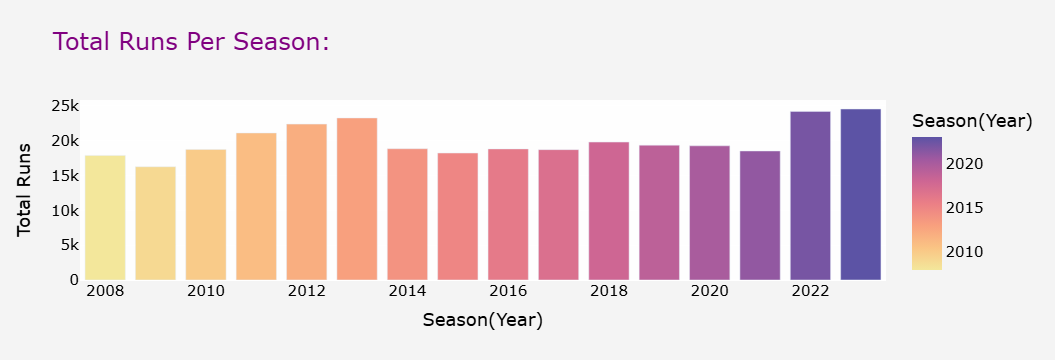

In [647]:
# Create a bar plot with Plotly
fig = px.bar(season_runs, x='season', y='runs', 
             title='Total Runs Per Season:', 
             labels={'season': 'Season(Year)', 'runs': 'Total Runs'},
             color='season', color_continuous_scale='sunset')
# Update the layout to change the background color
fig.update_layout(
    plot_bgcolor='rgba(255, 255, 255, 0.85)',  # Light background for the plot area
    paper_bgcolor='rgba(243, 243, 243, 0.9)',  # Light grey background for the entire figure
    title_font=dict(size=24, color='purple'),    # Title font color and size
    font=dict(size=15, color='Black')           # Axis labels font size and color
)
# Show the plot
fig.show()


In [309]:
# Example to filter out values beyond the whiskers
Q1 = df['runs'].quantile(0.25)
Q3 = df['runs'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['runs'] < lower_limit) | (df['runs'] > upper_limit)]
print(outliers)


        season  match_id match_name home_team away_team current_innings  \
6       2023.0   1359475   GT v CSK        GT       CSK             CSK   
8       2023.0   1359475   GT v CSK        GT       CSK             CSK   
18      2023.0   1359475   GT v CSK        GT       CSK             CSK   
19      2023.0   1359475   GT v CSK        GT       CSK             CSK   
22      2023.0   1359475   GT v CSK        GT       CSK             CSK   
...        ...       ...        ...       ...       ...             ...   
242519  2008.0    336040   CSK v RR       CSK        RR              RR   
242521  2008.0    336040   CSK v RR       CSK        RR              RR   
242524  2008.0    336040   CSK v RR       CSK        RR              RR   
242527  2008.0    336040   CSK v RR       CSK        RR              RR   
242543  2008.0    336040   CSK v RR       CSK        RR              RR   

        innings_id  over  ball  runs  ... bowler2_overs  bowler2_maidens  \
6                1     

In [310]:
print("Maximum Runs:", df['runs'].max())
print("Minimum Runs:", df['runs'].min())
print("Runs Summary:\n", df['runs'].describe())

Maximum Runs: 6
Minimum Runs: 0
Runs Summary:
 count    242549.000000
mean          1.317581
std           1.611804
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: runs, dtype: float64


In [311]:
print("Batsman1 Runs Maximun:", df['batsman1_runs'].max())
print("Batsman1 Runs Minimum:", df['batsman1_runs'].min())
print("Batsman1 Runs Summary:\n", df['batsman1_runs'].describe())

Batsman1 Runs Maximun: 174
Batsman1 Runs Minimum: 0
Batsman1 Runs Summary:
 count    242549.000000
mean         18.047698
std          18.341554
min           0.000000
25%           4.000000
50%          12.000000
75%          27.000000
max         174.000000
Name: batsman1_runs, dtype: float64


In [312]:
import plotly.express as px

In [313]:
# Calculate the distribution of 'runs'
runs_distribution = df['runs'].describe()

# Display the result
print("Distribution of Runs:\n", runs_distribution)


Distribution of Runs:
 count    242549.000000
mean          1.317581
std           1.611804
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: runs, dtype: float64


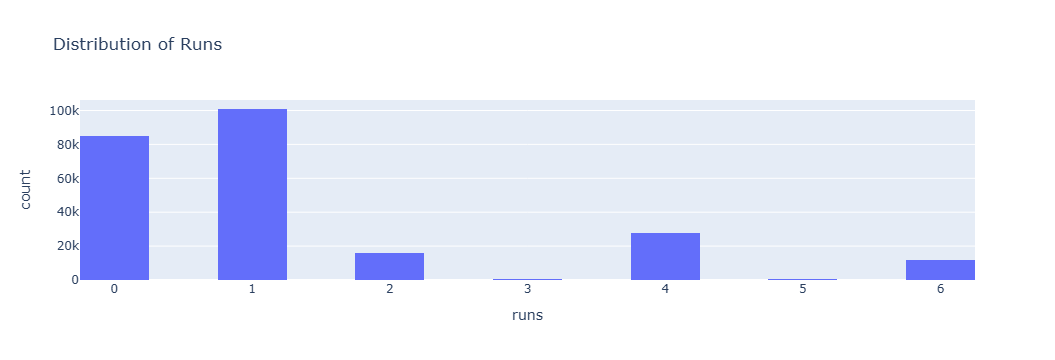

In [314]:
import plotly.express as px

# Histogram for 'runs'
fig_hist = px.histogram(df, x='runs', nbins=30, title="Distribution of Runs")
fig_hist.show()



In [315]:
# Calculate total runs per season
runs_per_season = df.groupby('season')['runs'].sum()

# Display the result
print("Total Runs per Season:\n", runs_per_season)


Total Runs per Season:
 season
2008.0    17870
2009.0    16239
2010.0    18724
2011.0    21082
2012.0    22352
2013.0    23235
2014.0    18823
2015.0    18208
2016.0    18797
2017.0    18694
2018.0    19778
2019.0    19335
2020.0    19240
2021.0    18502
2022.0    24179
2023.0    24520
Name: runs, dtype: int32


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14148\3302214593.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



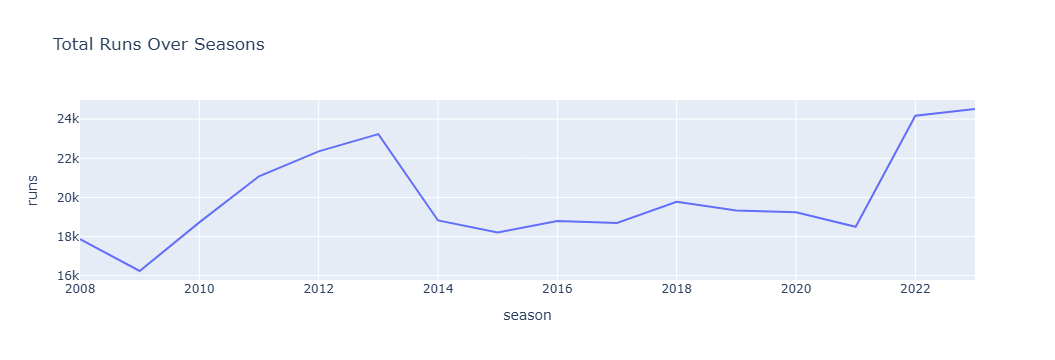

In [316]:
# Time series plot of runs over seasons
fig_line = px.line(runs_per_season.reset_index(), x='season', y='runs', title="Total Runs Over Seasons")
fig_line.show()


In [319]:
# Count boundaries (4s and 6s)
boundary_count = df[df['isBoundary'] == True]['runs'].value_counts().reset_index()
boundary_count.columns = ['Runs', 'Count']

# Display the result
print("Boundary Counts (4s and 6s):\n", boundary_count)


Boundary Counts (4s and 6s):
    Runs  Count
0     4  27401
1     6  11666
2     5    119


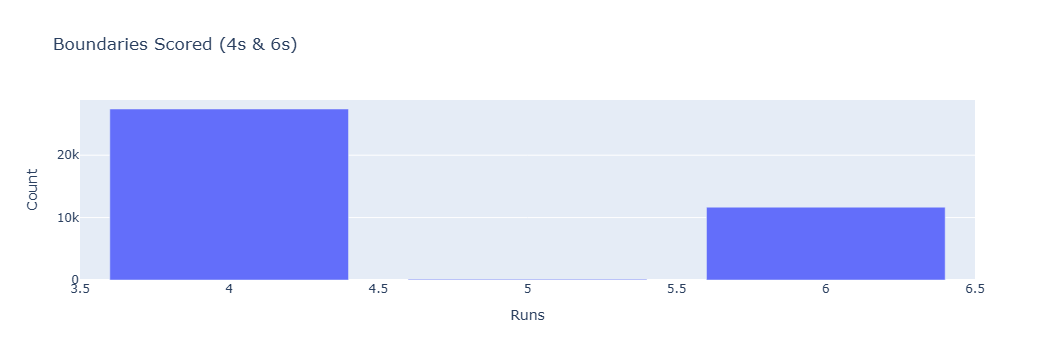

In [320]:
# Bar plot for counting boundaries scored
fig_bar_boundaries = px.bar(boundary_count, x='Runs', y='Count', title="Boundaries Scored (4s & 6s)")
fig_bar_boundaries.update_layout(xaxis_title="Runs", yaxis_title="Count")
fig_bar_boundaries.show()


In [321]:
# Convert the retired hurt count to a DataFrame
retired_hurt_count_df = retired_hurt_count.reset_index()
retired_hurt_count_df.columns = ['isRetiredHurt', 'count']

# Display the DataFrame to confirm
print(retired_hurt_count_df)


   isRetiredHurt   count
0          False  242532
1           True      17


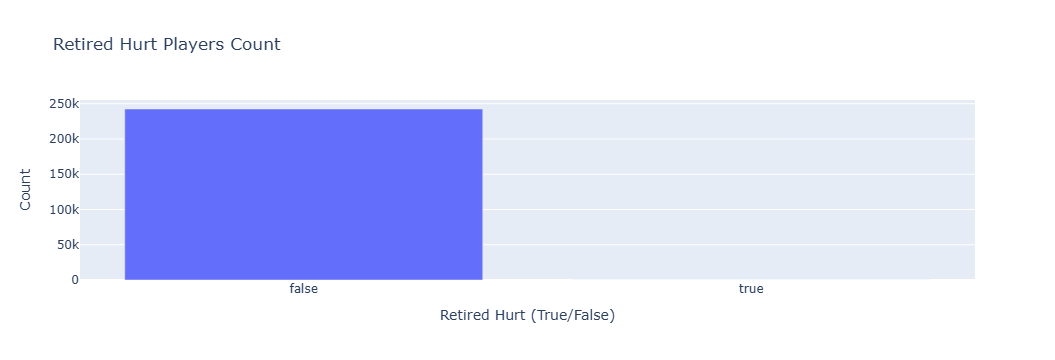

In [322]:
# Bar plot for players who retired hurt
fig_retired_hurt = px.bar(retired_hurt_count_df, x='isRetiredHurt', y='count', title="Retired Hurt Players Count")
fig_retired_hurt.update_layout(xaxis_title="Retired Hurt (True/False)", yaxis_title="Count")
fig_retired_hurt.show()


In [323]:
# Group by batsman1_name to get the total runs scored
top_batsmen = df.groupby('batsman1_name')['runs'].sum().reset_index().sort_values(by='runs', ascending=False).head(5)

print(top_batsmen)

      batsman1_name  runs
612     Virat Kohli  7512
520  Shikhar Dhawan  6947
148    David Warner  6719
469    Rohit Sharma  6411
561    Suresh Raina  5761


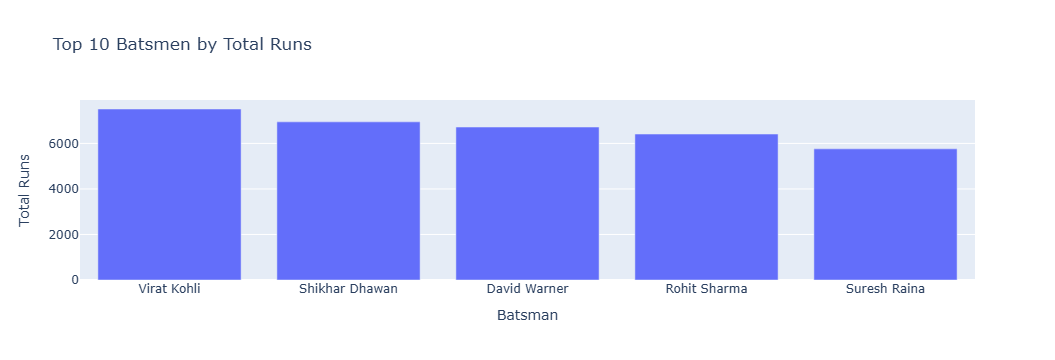

In [324]:
# Plot
fig_top_batsmen = px.bar(top_batsmen, x='batsman1_name', y='runs', title="Top 10 Batsmen by Total Runs")
fig_top_batsmen.update_layout(xaxis_title="Batsman", yaxis_title="Total Runs", xaxis=dict(tickangle=0))
fig_top_batsmen.show()

In [327]:
# Group by match_id and innings_id to calculate total runs per innings
runs_per_innings = df.groupby(['match_id', 'innings_id'])['runs'].sum().reset_index()
print(runs_per_innings)

      match_id  innings_id  runs
0       335982           1   222
1       335982           2    82
2       335983           1   240
3       335983           2   207
4       335984           1   129
...        ...         ...   ...
2039   1370351           2   101
2040   1370352           1   223
2041   1370352           2   171
2042   1370353           1   214
2043   1370353           2   171

[2044 rows x 3 columns]


In [513]:
# Filter matches with unrealistic scores
high_scoring_matches = runs_per_innings[runs_per_innings['runs'] > 200]
print(high_scoring_matches)

      match_id  innings_id  runs
0       335982           1   222
2       335983           1   240
3       335983           2   207
14      335989           1   206
16      335990           1   214
...        ...         ...   ...
2008   1359531           1   218
2022   1359538           1   213
2028   1359541           1   217
2040   1370352           1   223
2042   1370353           1   214

[137 rows x 3 columns]


In [329]:
import plotly.express as px

# Calculate total runs per match
total_runs_per_match = df.groupby(['match_id', 'match_name'])['runs'].sum().reset_index()

# Get the top 10 highest scoring matches
top_10_matches = total_runs_per_match.sort_values('runs', ascending=False).head(10)

print(total_runs_per_match)
print('\nTop 10 Matches Score:\n', top_10_matches)


      match_id  match_name  runs
0       335982   RCB v KKR   304
1       335983  KXIP v CSK   447
2       335984     DC v RR   261
3       335985    MI v RCB   331
4       335986    KKR v DC   222
...        ...         ...   ...
1018   1359544    RCB v GT   395
1019   1370350    CSK v GT   318
1020   1370351    LSG v MI   283
1021   1370352     GT v MI   394
1022   1370353    GT v CSK   385

[1023 rows x 3 columns]

Top 10 Matches Score:
      match_id  match_name  runs
146    419137    CSK v RR   469
679   1136604  KXIP v KKR   459
987   1359512  PBKS v LSG   448
1      335983  KXIP v CSK   447
973   1359498   RCB v CSK   443
791   1216527   RR v KXIP   442
626   1082641   MI v KXIP   442
819   1254061   RR v PBKS   438
779   1216515    DC v KKR   437
199    501223   DC v KXIP   432


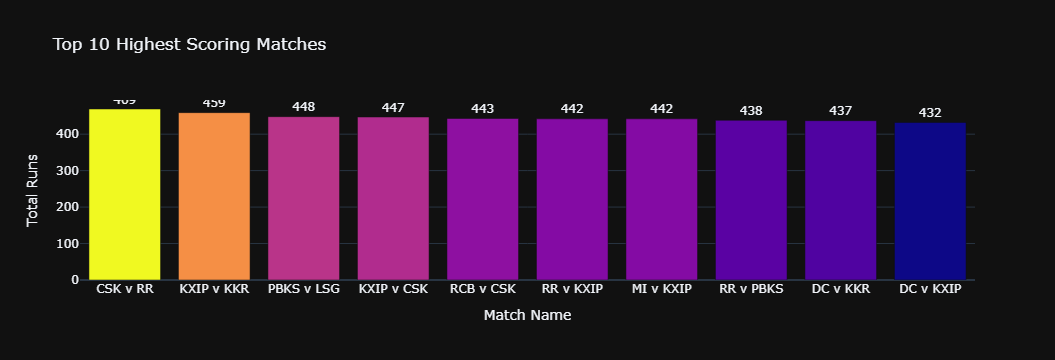

In [501]:
# Create a bar chart
fig = px.bar(
    top_10_matches,
    x='match_name',  # Match name as the x-axis
    y='runs',  # Total runs as the y-axis
    color='runs',  # Color based on total runs
    title='Top 10 Highest Scoring Matches',
    text='runs',  # Display total runs on the bars
    labels={'runs': 'Total Runs', 'match_name': 'Match Name'}
)

# Update layout for better visualization
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Match Name",
    yaxis_title="Total Runs",
    coloraxis_showscale=False,  # Hide color scale
    template="plotly_dark"
)

# Show the figure
fig.show()


In [489]:
extras = df[df['isWide'] | df['isNoball']].groupby(['isWide', 'isNoball']).size().reset_index(name='count')
extras['Type'] = extras.apply(lambda row: 'Wide' if row['isWide'] else 'No Ball', axis=1)
print('\nExtras Distributions:\n',extras)


Extras Distributions:
    isWide  isNoball  count     Type
0   False      True   1001  No Ball
1    True     False   7601     Wide


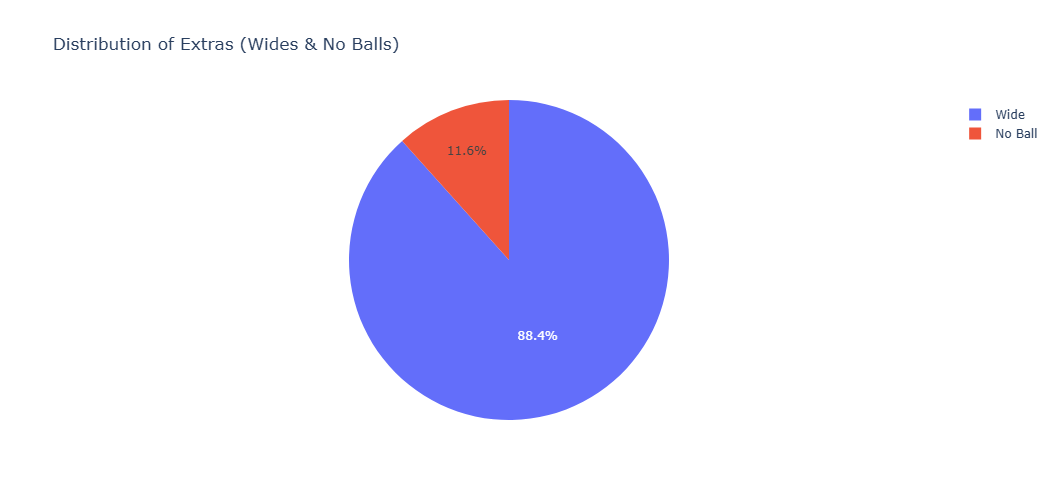

In [511]:
# Pie chart with increased size and custom colors
fig = px.pie(
    extras, 
    names='Type', 
    values='count', 
    title='Distribution of Extras (Wides & No Balls)',
    color_discrete_sequence=['#636EFA', '#EF553B']  # Custom colors: Blue and Red
)
# Increase figure size
fig.update_layout(width=900, height=500)
fig.show()


In [352]:
df.isnull().sum()


season                 0
match_id               0
match_name             0
home_team              0
away_team              0
current_innings        0
innings_id             0
over                   0
ball                   0
runs                   0
shortText              0
isBoundary             0
isWide                 0
isNoball               0
batsman1_id            0
batsman1_name          0
batsman1_runs          0
batsman1_balls         0
bowler1_id             0
bowler1_name           0
bowler1_overs          0
bowler1_maidens        0
bowler1_runs           0
bowler1_wkts           0
batsman2_id            0
batsman2_name          0
batsman2_runs          0
batsman2_balls         0
bowler2_id             0
bowler2_name           0
bowler2_overs          0
bowler2_maidens        0
bowler2_runs           0
bowler2_wkts           0
wkt_batsman_name       0
wkt_bowler_name        0
wkt_batsman_runs       0
wkt_batsman_balls      0
isRetiredHurt          0
runs_log               0


In [354]:
df['over_category'] = df['over'].apply(lambda x: 'Powerplay' if x <= 6 else 'Death Overs' if x >= 16 else 'Middle Overs')
runs_by_over_category = df.groupby('over_category').agg({'runs': 'sum'}).reset_index()


In [487]:
print('\nRuns By Category of Phases(Overs) in Match:\n',runs_by_over_category)


Runs By Category of Phases(Overs) in Match:
   over_category    runs
0   Death Overs   85317
1  Middle Overs  139446
2     Powerplay   94815


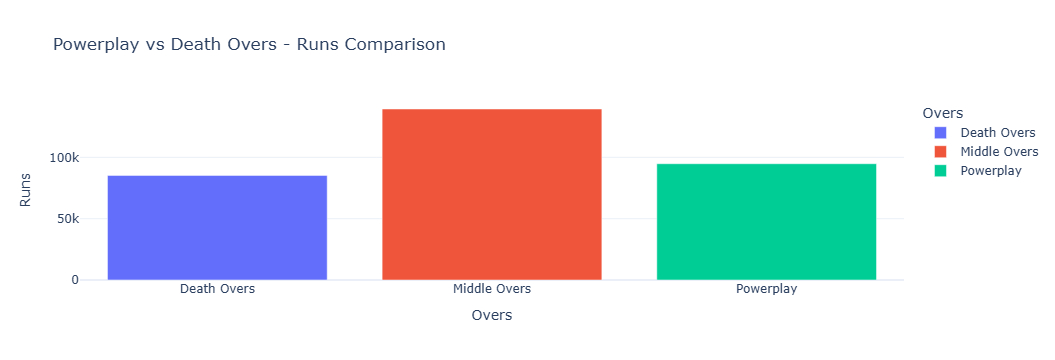

In [358]:
fig = px.bar(runs_by_over_category, x='over_category', y='runs', color='over_category', 
             title='Powerplay vs Death Overs - Runs Comparison', labels={'over_category': 'Overs', 'runs': 'Runs'})
fig.update_layout(template='plotly_white')
fig.show()

In [382]:
dot_balls = df[df['runs'] == 0].groupby('bowler1_name').size().reset_index(name='dot_balls')
total_balls = df.groupby('bowler1_name').size().reset_index(name='total_balls')
bowler_dot_stats = pd.merge(dot_balls, total_balls, on='bowler1_name')
bowler_dot_stats['dot_percentage'] = (bowler_dot_stats['dot_balls'] / bowler_dot_stats['total_balls']) * 100

print('\nDot Balls Statistics By Bowlers:\n',bowler_dot_stats)


Dot Balls Statistics By Bowlers:
          bowler1_name  dot_balls  total_balls  dot_percentage
0         Aaron Finch         13           44       29.545455
1     Aavishkar Salvi         57          154       37.012987
2         Abdul Samad         11           55       20.000000
3        Abdur Razzak          5           14       35.714286
4    Abhimanyu Mithun         88          305       28.852459
..                ...        ...          ...             ...
487     Yusuf Abdulla         87          219       39.726027
488      Yusuf Pathan        393         1184       33.192568
489      Yuvraj Singh        258          882       29.251701
490  Yuzvendra Chahal       1096         3265       33.568147
491       Zaheer Khan        872         2275       38.329670

[492 rows x 4 columns]


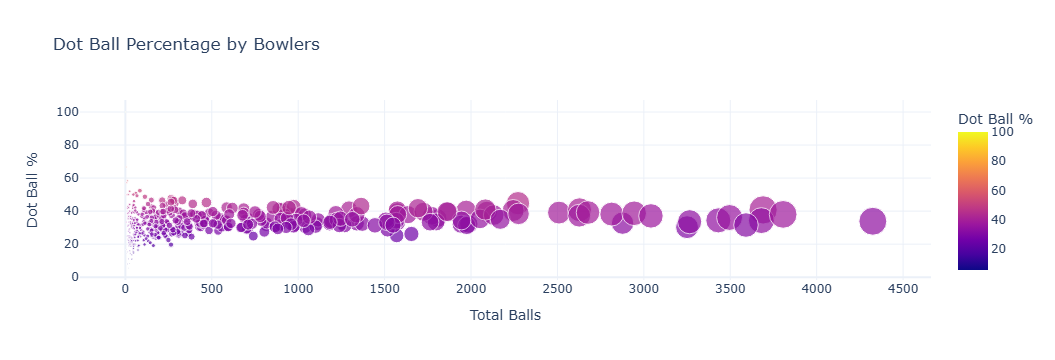

In [370]:
fig = px.scatter(bowler_dot_stats, x='total_balls', y='dot_percentage', size='dot_balls', color='dot_percentage', 
                 hover_name='bowler1_name', title='Dot Ball Percentage by Bowlers',
                 labels={'total_balls': 'Total Balls', 'dot_percentage': 'Dot Ball %'})
fig.update_layout(template='plotly_white')
fig.show()


In [413]:
team_dot_balls = df[df['runs'] == 0].groupby('home_team').size().reset_index(name='dot_balls')
team_total_balls = df.groupby('home_team').size().reset_index(name='total_balls')
team_dot_effectiveness = pd.merge(team_dot_balls, team_total_balls, on='home_team')
team_dot_effectiveness['dot_percentage'] = (team_dot_effectiveness['dot_balls'] / team_dot_effectiveness['total_balls']) * 100

# Sort by dot_percentage in descending order
team_dot_effectiveness = team_dot_effectiveness.sort_values(by='dot_percentage', ascending=False)
print('\nTeam That Conceeded more Dot Balls:\n',team_dot_effectiveness)


Team That Conceeded more Dot Balls:
    home_team  dot_balls  total_balls  dot_percentage
6      Kochi        619         1559       39.704939
10       PWI       2072         5478       37.824023
4        KKR       9708        26724       36.326897
7        LSG       1299         3598       36.103391
14       SRH      10256        29061       35.291284
8         MI       9998        28333       35.287474
11       RCB       9927        28478       34.858487
0        CSK      10296        29624       34.755604
13        RR       7893        22804       34.612349
9       PBKS       1667         4817       34.606602
1         DC       9954        28900       34.442907
5       KXIP       7410        21994       33.691007
3         GT       1412         4369       32.318608
12       RPS       1061         3284       32.308161
2         GL       1122         3526       31.820760


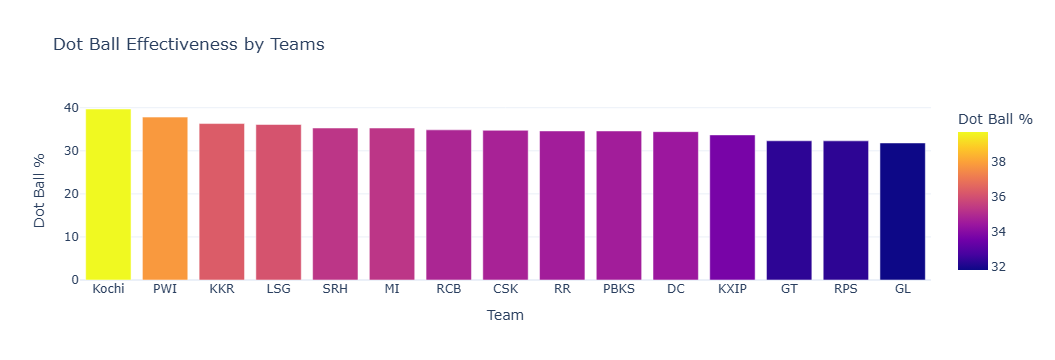

In [415]:
fig = px.bar(team_dot_effectiveness, x='home_team', y='dot_percentage', 
             title='Dot Ball Effectiveness by Teams', labels={'home_team': 'Team', 'dot_percentage': 'Dot Ball %'},
             color='dot_percentage')
fig.update_layout(template='plotly_white')
fig.show()

In [447]:
partnerships = df.groupby(['match_id','match_name', 'batsman1_name', 'batsman2_name'])['runs'].sum().reset_index()
top_partnerships = partnerships.sort_values(by='runs', ascending=False).head(5)
print('\nTop 5 Partnerships In IPL:\n',top_partnerships)


Top 5 Partnerships In IPL:
        match_id match_name    batsman1_name         batsman2_name  runs
23256   1304112  KKR v LSG  Quinton de Kock              KL Rahul   141
12419    829795   MI v RCB   AB de Villiers           Virat Kohli   138
13780    980987   RCB v GL   AB de Villiers           Virat Kohli   132
8751     598027  RCB v PWI      Chris Gayle  Tillakaratne Dilshan   130
7741     548372   DC v RCB      Chris Gayle           Virat Kohli   127


In [459]:
# Grouping partnerships and sorting
partnerships = df.groupby(['match_id','match_name', 'batsman1_name', 'batsman2_name'])['runs'].sum().reset_index()
top_partnerships = partnerships.sort_values(by='runs', ascending=False).head(5)
top_partnerships['Partnership'] = top_partnerships['batsman1_name'] + " & " + top_partnerships['batsman2_name']
print(top_partnerships)

       match_id match_name    batsman1_name         batsman2_name  runs  \
23256   1304112  KKR v LSG  Quinton de Kock              KL Rahul   141   
12419    829795   MI v RCB   AB de Villiers           Virat Kohli   138   
13780    980987   RCB v GL   AB de Villiers           Virat Kohli   132   
8751     598027  RCB v PWI      Chris Gayle  Tillakaratne Dilshan   130   
7741     548372   DC v RCB      Chris Gayle           Virat Kohli   127   

                              Partnership  
23256          Quinton de Kock & KL Rahul  
12419        AB de Villiers & Virat Kohli  
13780        AB de Villiers & Virat Kohli  
8751   Chris Gayle & Tillakaratne Dilshan  
7741            Chris Gayle & Virat Kohli  


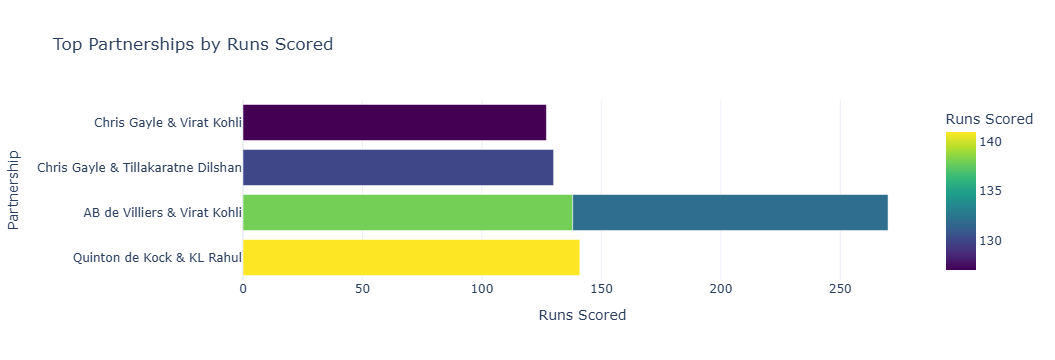

In [483]:
# Plotting with Plotly Express
fig = px.bar(
    top_partnerships, 
    x='runs', 
    y='Partnership', 
    orientation='h', 
    title='Top Partnerships by Runs Scored', 
    labels={'runs': 'Runs Scored', 'Partnership': 'Partnership'},
    color='runs', 
    color_continuous_scale='viridis'
)

fig.update_layout(template='plotly_white', height=400)
fig.show()

In [693]:
#top bowlers
top_bowlers = df.groupby('bowler1_name')['bowler1_wkts'].sum().sort_values(ascending=False).head(10)
print('\nTop 10 Bowlers Across Seasons:\n')
print(top_bowlers)


Top 10 Bowlers Across Seasons:

bowler1_name
Yuzvendra Chahal       1966
Piyush Chawla          1960
Ravichandran Ashwin    1918
Amit Mishra            1875
Bhuvneshwar Kumar      1721
Sunil Narine           1693
Harbhajan Singh        1677
Dwayne Bravo           1668
Lasith Malinga         1614
Ravindra Jadeja        1554
Name: bowler1_wkts, dtype: int64


In [784]:
from sklearn.preprocessing import LabelEncoder

In [786]:
expected_columns = ['home_team', 'away_team', 'current_innings']
existing_columns = [col for col in expected_columns if col in df.columns]
print("Found columns:", existing_columns)

Found columns: ['home_team', 'away_team', 'current_innings']


In [788]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

In [790]:
unique_teams = df['home_team'].unique()
unique_teams

array(['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI',
       'KXIP', 'RPS', 'GL', 'PWI', 'Kochi'], dtype=object)

In [792]:
unique_teams_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']

In [794]:
unique_hometeam_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']
unique_awayteam_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']
current_innings_mapping=['GT', 'PBKS', 'LSG', 'SRH', 'RCB', 'CSK', 'DC', 'RR', 'KKR', 'MI','KXIP', 'RPS', 'GL', 'PWI', 'Kochi']

In [796]:
che=OneHotEncoder(sparse_output=False)
ode=OrdinalEncoder(categories=[unique_hometeam_mapping,unique_awayteam_mapping,current_innings_mapping],
                   handle_unknown='use_encoded_value', 
                    unknown_value=-1)

In [798]:
ce = make_column_transformer(
    (ode,['home_team','away_team','current_innings']),
    remainder='passthrough'
)
ce.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(categories=[['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi'],
                                                            ['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi'],
                                                            ['GT', 'PBKS',
                                                             'LSG', 'SRH',
                                                             'RCB', 'CSK', 'DC',
                                                             'RR', 'KKR', 'MI',
                                                             'KXIP', 'RPS',
                                                             'GL', 'PWI',
                                                             'Kochi']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['home_team', 'away_team',
                                  'current_innings'])])

In [799]:
data_encoded = ce.fit_transform(df)

In [801]:
data_encoded

ordinalencoder__home_team  ordinalencoder__away_team  \
0                             0.0                        5.0   
1                             0.0                        5.0   
2                             0.0                        5.0   
3                             0.0                        5.0   
4                             0.0                        5.0   
...                           ...                        ...   
242545                        5.0                        7.0   
242546                        5.0                        7.0   
242547                        5.0                        7.0   
242548                        5.0                        7.0   
242549                        5.0                        7.0   

        ordinalencoder__current_innings remainder__season  \
0                                   5.0            2023.0   
1                                   5.0            2023.0   
2                                   5.0            2023.0   
3                                   5.0            2023.0   
4                                   5.0            2023.0   
...                                 ...               ...   
242545                              7.0            2008.0   
242546                              7.0            2008.0   
242547                              7.0            2008.0   
242548                              7.0            2008.0   
242549                              7.0            2008.0   

        remainder__match_id remainder__match_name  remainder__innings_id  \
0                   1359475              GT v CSK                      1   
1                   1359475              GT v CSK                      1   
2                   1359475              GT v CSK                      1   
3                   1359475              GT v CSK                      1   
4                   1359475              GT v CSK                      1   
...                     ...                   ...                    ...   
242545               336040              CSK v RR                      2   
242546               336040              CSK v RR                      2   
242547               336040              CSK v RR                      2   
242548               336040              CSK v RR                      2   
242549               336040              CSK v RR                      2   

        remainder__over  remainder__ball  remainder__runs  ...  \
0                     1                1                0  ...   
1                     1                2                1  ...   
2                     1                3                0  ...   
3                     1                4                1  ...   
4                     1                5                0  ...   
...                 ...              ...              ...  ...   
242545               20                2                0  ...   
242546               20                3                1  ...   
242547               20                4                1  ...   
242548               20                4                2  ...   
242549               20                5                2  ...   

       remainder__run_rate  remainder__match_name_encoded  \
0                 0.000000                             33   
1                 0.750000                             33   
2                 0.000000                             33   
3                 0.600000                             33   
4                 0.000000                             33   
...                    ...                            ...   
242545            0.000000                             10   
242546            0.048780                             10   
242547            0.048387                             10   
242548            0.096774                             10   
242549            0.096000                             10   

        remainder__batsman1_name_encoded  remainder__batsman2_name_

In [802]:
data_encoded.columns.tolist()

['ordinalencoder__home_team',
 'ordinalencoder__away_team',
 'ordinalencoder__current_innings',
 'remainder__season',
 'remainder__match_id',
 'remainder__match_name',
 'remainder__innings_id',
 'remainder__over',
 'remainder__ball',
 'remainder__runs',
 'remainder__shortText',
 'remainder__isBoundary',
 'remainder__isWide',
 'remainder__isNoball',
 'remainder__batsman1_id',
 'remainder__batsman1_name',
 'remainder__batsman1_runs',
 'remainder__batsman1_balls',
 'remainder__bowler1_id',
 'remainder__bowler1_name',
 'remainder__bowler1_overs',
 'remainder__bowler1_maidens',
 'remainder__bowler1_runs',
 'remainder__bowler1_wkts',
 'remainder__batsman2_id',
 'remainder__batsman2_name',
 'remainder__batsman2_runs',
 'remainder__batsman2_balls',
 'remainder__bowler2_id',
 'remainder__bowler2_name',
 'remainder__bowler2_overs',
 'remainder__bowler2_maidens',
 'remainder__bowler2_runs',
 'remainder__bowler2_wkts',
 'remainder__wkt_batsman_name',
 'remainder__wkt_bowler_name',
 'remainder__wkt

In [804]:
column_renaming = {
    'ordinalencoder__home_team': 'home_team_encoded',
    'ordinalencoder__away_team': 'away_team_encoded',
    'ordinalencoder__current_innings': 'current_innings_encoded',
    'remainder__season': 'season',
    'remainder__match_id': 'match_id',
    'remainder__over': 'over',
    'remainder__ball': 'ball',
    'remainder__wkt_batsman_runs': 'wkt_batsman_runs',
    'remainder__cumulative_runs': 'cumulative_runs',
    'remainder__wickets_lost': 'wickets_lost',
    'remainder__overs_bowled': 'overs_bowled',
    'remainder__run_rate': 'run_rate'
}
print(column_renaming)

{'ordinalencoder__home_team': 'home_team_encoded', 'ordinalencoder__away_team': 'away_team_encoded', 'ordinalencoder__current_innings': 'current_innings_encoded', 'remainder__season': 'season', 'remainder__match_id': 'match_id', 'remainder__over': 'over', 'remainder__ball': 'ball', 'remainder__wkt_batsman_runs': 'wkt_batsman_runs', 'remainder__cumulative_runs': 'cumulative_runs', 'remainder__wickets_lost': 'wickets_lost', 'remainder__overs_bowled': 'overs_bowled', 'remainder__run_rate': 'run_rate'}


In [809]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [811]:
X = data_encoded[['current_innings_encoded','over','ball','run_rate','wickets_lost']]
y = data_encoded['cumulative_runs']

KeyError: "None of [Index(['current_innings_encoded', 'over', 'ball', 'run_rate', 'wickets_lost'], dtype='object')] are in the [columns]"

In [813]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [764]:
X_train

current_innings_encoded  over  ball  run_rate  wickets_lost
34081                       9.0     2     2  0.000000         34081
173213                      6.0    18     6  0.105263        173213
94294                       9.0    11     6  0.333333         94294
200584                      9.0     5     6  0.000000        200584
212665                      5.0     3     4  0.000000        212665
...                         ...   ...   ...       ...           ...
119880                      3.0    10     6  0.000000        119880
103695                      3.0    12     4  0.000000        103695
131933                      4.0     6     1  0.162162        131933
146868                      3.0    18     6  0.000000        146868
121959                      7.0    10     6  0.000000        121959

[169784 rows x 5 columns]

In [766]:
X_test

current_innings_encoded  over  ball  run_rate  wickets_lost
122567                      9.0    10     5  0.000000        122567
147657                      9.0     5     2  0.750000        147657
27100                       0.0     1     1  0.000000         27100
42494                       5.0     2     5  0.000000         42494
154360                      3.0    19     1  0.313043        154360
...                         ...   ...   ...       ...           ...
131428                      3.0    10     2  0.096774        131428
43183                       3.0    16     1  0.371134         43183
218090                      4.0    18     2  0.054545        218090
73730                       6.0     1     6  0.500000         73730
193888                      6.0    14     6  0.000000        193888

[72765 rows x 5 columns]

In [768]:
y_train

34081      47656
173213    231737
94294     128604
200584    265975
212665    281935
           ...  
119880    162863
103695    141444
131933    179119
146868    198581
121959    165723
Name: cumulative_runs, Length: 169784, dtype: int32

In [770]:
y_test

122567    166553
147657    199718
27100      38376
42494      58269
154360    207888
           ...  
131428    178439
43183      59237
218090    288627
73730     100085
193888    257628
Name: cumulative_runs, Length: 72765, dtype: int32

In [772]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)

In [774]:
rf_model

RandomForestRegressor(max_depth=10, random_state=42)

In [776]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [777]:
y_rf_simple_pred=rf_model.predict(X_test)

In [778]:
rf_simple_mse=mean_squared_error(y_test,y_rf_simple_pred)
rf_r2=r2_score(y_test,y_rf_simple_pred)

In [779]:
print('MSE score: ',rf_simple_mse)
print('R2 score: ',rf_r2)

MSE score:  477.86939478945266
R2 score:  0.9999999435684904
